#  第五讲 无标度网络【实践】一

## 1、道路网络和航空网络的度分布

In [1]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 加载euroroad数据集
df1 = pd.read_csv("euroroad.csv")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())

# 加载openflights数据集
df2 = pd.read_csv("openflights.csv")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())

print(len(G1.nodes()), len(G2.nodes()))

1174 3425


In [2]:
# 定义求度分布的函数
def get_pdf(G):
    all_k = [G.degree(i) for i in G.nodes()]
    k = list(set(all_k))  # 获取所有可能的度值
    N = len(G.nodes())
    
    Pk = []
    for ki in sorted(k):
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1  
        Pk.append(c/N)     
    
    return sorted(k), Pk

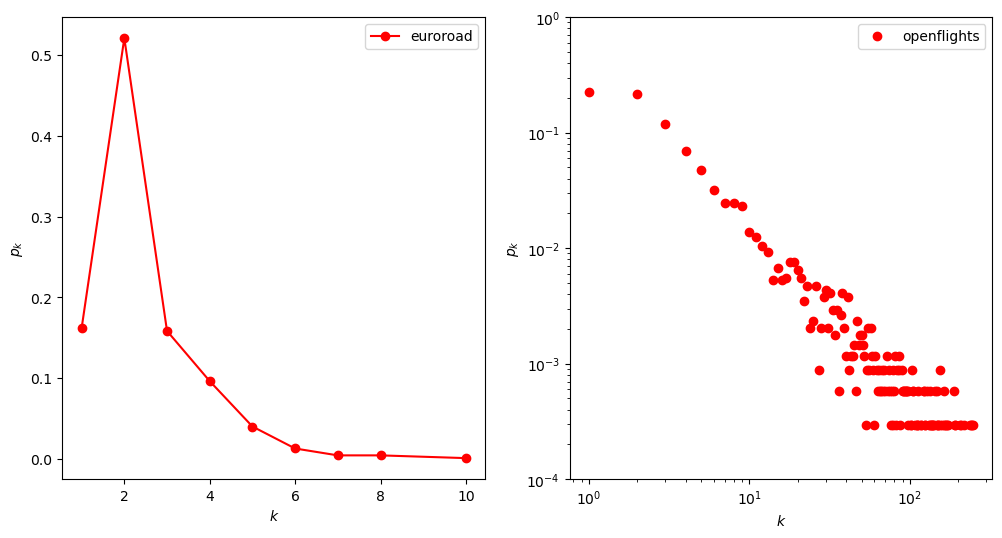

In [3]:
deg1 = [G1.degree(i) for i in G1.nodes()]
deg2 = [G2.degree(i) for i in G2.nodes()]

k1, Pk1 = get_pdf(G1)
k2, Pk2 = get_pdf(G2)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(k1, Pk1, 'ro-', label='euroroad')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")

plt.subplot(122)
plt.plot(k2, Pk2, 'ro', label='openflights')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")

## 2、对于航空网络，粗略拟合度分布

In [4]:
from scipy import optimize

def fit_line(x, a, b):
    return a * x + b


d:\work\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


斜率 a =  -1.366312420298909


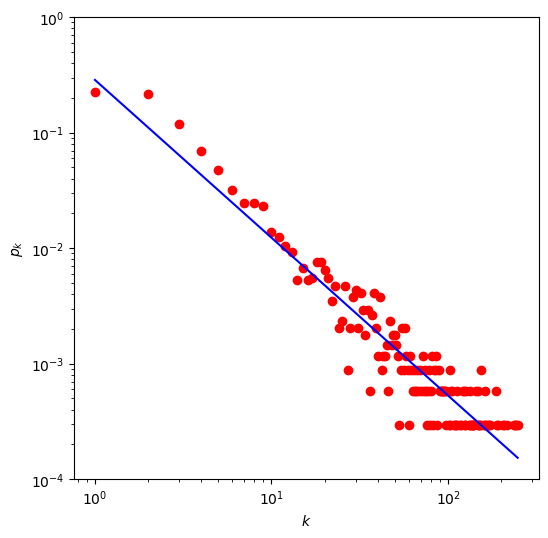

In [5]:
x = np.log10(np.array(k2))
y = np.log10(np.array(Pk2))

kmin2, kmax2 = min(deg2), max(deg2)
# 拟合
a, b = optimize.curve_fit(fit_line, x, y)[0]
print("斜率 a = ", a)

x1 = np.arange(kmin2, kmax2, 0.01)
y1 = (10**b) * (x1 ** a)

plt.figure(figsize=(6,6))
plt.plot(k2, Pk2, 'ro')
plt.plot(x1, y1, 'b-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")

In [6]:
import powerlaw
# 安装：pip install powerlaw

data = [G2.degree(i) for i in G2.nodes()]
print(max(data))

fit = powerlaw.Fit(data)
print(fit)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

248
kmin: 2.0
gamma: 1.9028919860606162
D: 0.05721869113396072


Calculating best minimal value for power law fit
d:\work\miniconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


<AxesSubplot:>

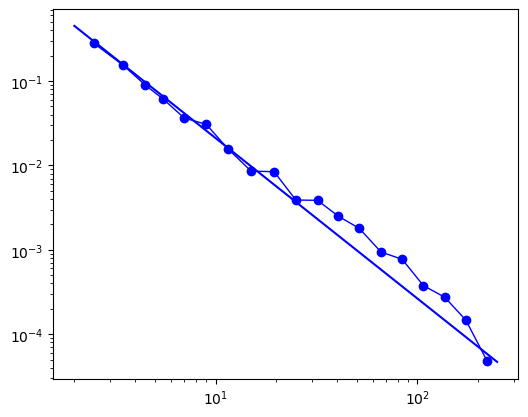

In [7]:
plt.figure(figsize=[6, 4.8])
fig = fit.plot_pdf(marker = 'o', color='b', linewidth=1)
fit.power_law.plot_pdf(color='b', linestyle='-', ax=fig)

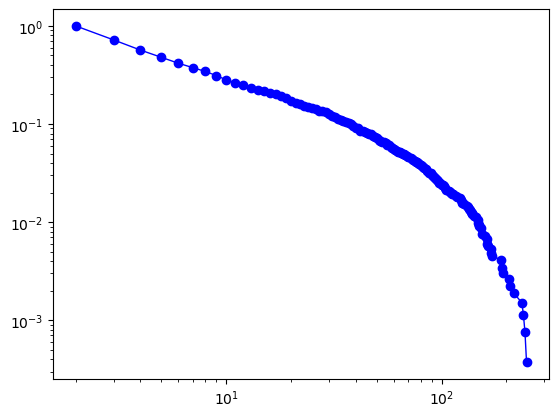

In [8]:
fig = fit.plot_ccdf(marker = 'o', color='b', linewidth=1)

## 3、生成符合幂律分布的度序列

In [9]:
from networkx.utils import powerlaw_sequence

degree_seq = powerlaw_sequence(10000, exponent=2.5)
int_deg = [int(di) for di in degree_seq]
# print(int_deg)

fit = powerlaw.Fit(int_deg)
print(fit)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)


kmin: 5.0
gamma: 2.5399055432653372
D: 0.03027413251718758


Calculating best minimal value for power law fit


<AxesSubplot:>

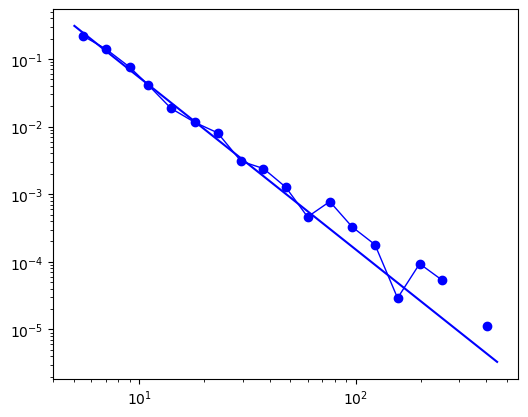

In [10]:
plt.figure(figsize=[6, 4.8])
fig = fit.plot_pdf(marker = 'o', color='b', linewidth=1)
fit.power_law.plot_pdf(color='b', linestyle='-', ax=fig)

#  第五讲 无标度网络【实践】二

## 1、配置模型生成给定度序列的网络

In [11]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.utils import powerlaw_sequence
from my_utils import *

n, gamma = 5000, 2.1
degree_seq = powerlaw_sequence(n, gamma)
int_deg = [int(di) for di in degree_seq]

while sum(int_deg)%2 != 0:
    degree_seq = powerlaw_sequence(n, gamma)
    int_deg = [int(di) for di in degree_seq]
    
    
G = nx.configuration_model(int_deg)
# 该模型会生成自环和多重链接，而这些在真实网络中通常是不会出现的
for e in G.edges():
    if e[0]==e[1]:
        print(e)

(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(163, 163)
(773, 773)
(1052, 1052)
(1616, 1616)
(1616, 1616)
(1616, 1616)
(2967, 2967)
(2967, 2967)
(2967, 2967)
(2967, 2967)
(2967, 2967)
(2967, 2967)
(3141, 3141)
(3141, 3141)
(3141, 3141)
(3141, 3141)
(3141, 3141)
(3141, 3141)
(3339, 3339)
(3934, 3934)
(3934, 3934)
(3934, 3934)
(3941, 3941)
(4178, 4178)
(4178, 4178)
(4424, 4424)
(4424, 4424)
(4424, 4424)
(4665, 4665)


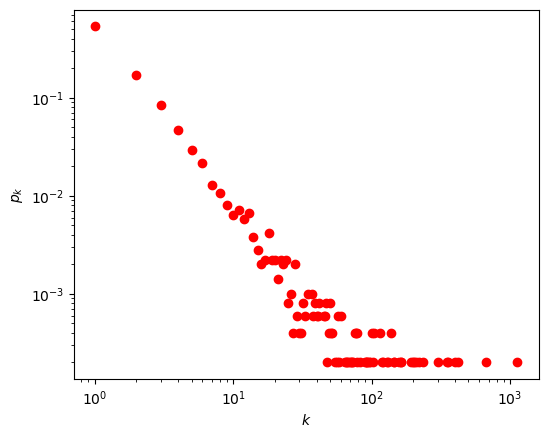

In [12]:
k, Pk = get_pdf(G)

plt.figure(figsize=(6,4.8))
plt.plot(k, Pk, 'ro')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")

## 2、隐参数模型生成给定度分布指数的无标度网络

In [13]:
N = 5000
gamma = 2.1
avk = 6.0
L = int(avk*N/2)

G = generate_SF_network(N, gamma, L)
k, Pk = get_pdf(G)

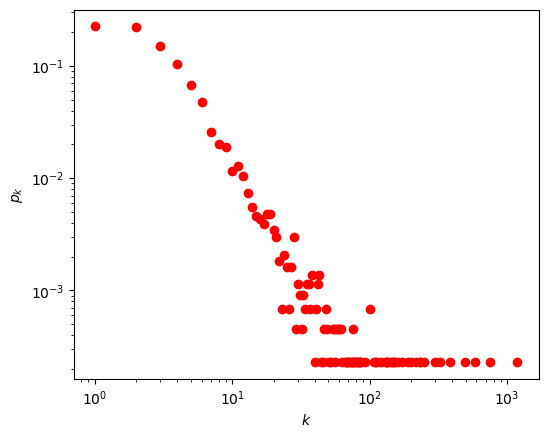

In [14]:
plt.figure(figsize=(6, 4.8))
plt.plot(k, Pk, 'ro')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")

## 3、度保持的网络随机化

In [15]:
# 加载蛋白质网络数据集
df = pd.read_csv("protein_interaction.csv")
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using = nx.Graph())
print(len(G.nodes()), len(G.edges()))

2018 2930


In [16]:
# 删除self-loops
self_edges = []
for e in G.edges():
    if e[0]==e[1]:
        self_edges.append(e)
G.remove_edges_from(self_edges)

Gcc = sorted(nx.connected_components(G), key=len, reverse=True) 
# 得到图G的最大连通组件
LCC = G.subgraph(Gcc[0])

# 获取原始网络的最大连通子图节点数和连边数
N, M = len(LCC.nodes), len(LCC.edges())
print(N, M)
# nx.draw(LCC, pos=nx.kamada_kawai_layout(LCC), node_size=30, node_color="red")

1647 2518


In [17]:
print(nx.average_clustering(LCC))

# 生成度保持的随机化网络：调用double_edge_swap函数
newG = LCC.copy()
G_d = nx.double_edge_swap(newG, nswap=M, max_tries=5*M)
print(nx.average_clustering(G_d))
# nx.draw(G_d, pos=nx.kamada_kawai_layout(G_d), node_size=30, node_color="red")

0.05659957171711166
0.011658302045325501


In [18]:
# 生成完全随机化的网络
G_r = nx.gnm_random_graph(N, M)

### 测试小世界性质

Text(0, 0.5, '$p_d$')

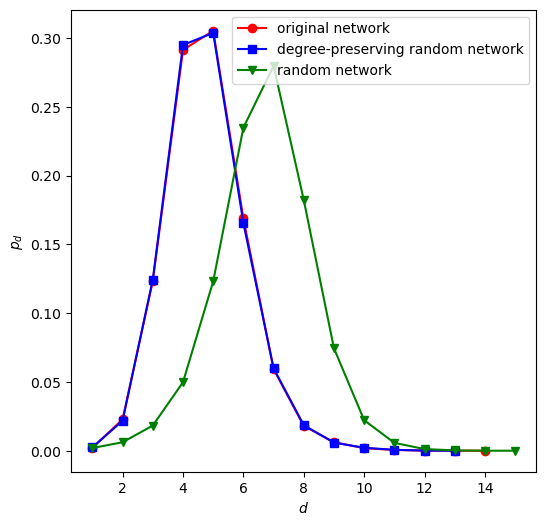

In [19]:
all_sp1, Pl = get_pdf_spl(newG)
all_sp1_d, Pl_d = get_pdf_spl(G_d)
all_sp1_r, Pl_r = get_pdf_spl(G_r)

plt.figure(figsize=(6,6))
plt.plot(all_sp1, Pl, 'ro-', label='original network')
plt.plot(all_sp1_d, Pl_d, 'bs-', label='degree-preserving random network')
plt.plot(all_sp1_r, Pl_r, 'gv-', label='random network')
plt.legend(loc=0)
plt.xlabel("$d$")
plt.ylabel("$p_d$")

In [20]:
print(nx.is_connected(LCC))
print(nx.is_connected(G_d))

True
False


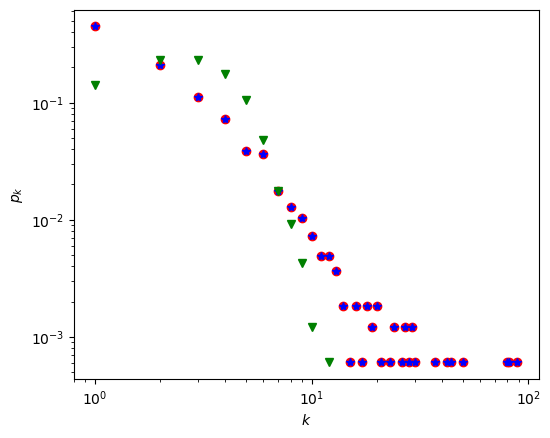

In [21]:
k1, Pk1 = get_pdf(LCC)
k2, Pk2 = get_pdf(G_d)
k3, Pk3 = get_pdf(G_r)

plt.figure(figsize=(6, 4.8))
plt.plot(k1, Pk1, 'ro')
plt.plot(k2, Pk2, 'b*')
plt.plot(k3, Pk3, 'gv')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xscale("log")
plt.yscale("log")

#  第五讲 无标度网络【实践】三

## 1、精确地绘制幂律分布（见书籍进阶阅读3.B）

<AxesSubplot:>

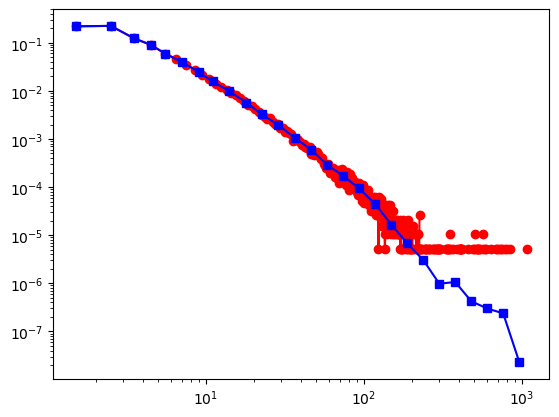

In [23]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

# internet网络
edges = [tuple(line) for line in np.loadtxt("internet.txt")]
G1 = nx.Graph()
G1.add_edges_from(edges)

degree_seq1 = [G1.degree(i) for i in G1.nodes()]

# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq1, linear_bins = False, color = 'b', marker='s')

<AxesSubplot:>

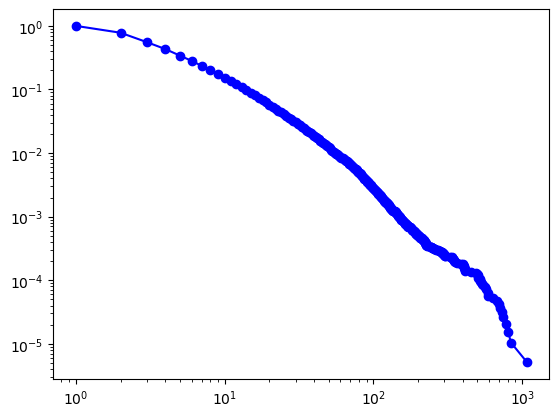

In [24]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq1, color = 'b', marker='o')

In [25]:
# BA无标度网络
G2 = nx.barabasi_albert_graph(100000,2)
degree_seq2 = [G2.degree(i) for i in G2.nodes()]

<AxesSubplot:>

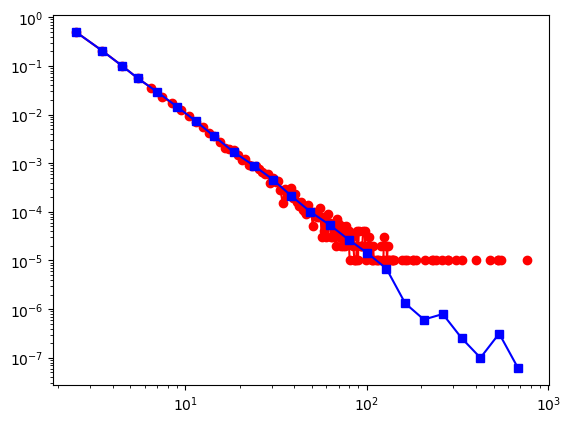

In [26]:
# 对数坐标，线性分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = True, color = 'r', marker='o')
# 对数坐标，对数分箱
powerlaw.plot_pdf(degree_seq2, linear_bins = False, color = 'b', marker='s')

<AxesSubplot:>

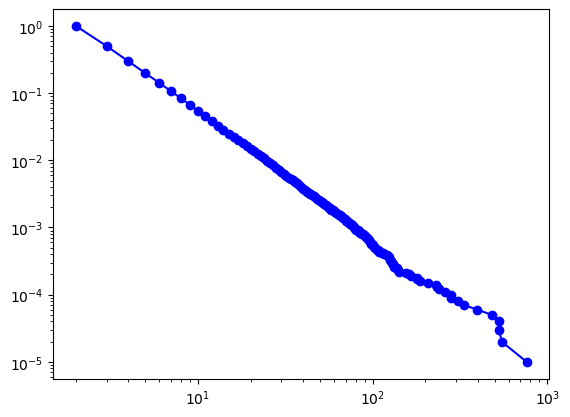

In [27]:
# 对数坐标，累积度分布
powerlaw.plot_ccdf(degree_seq2, color = 'b', marker='o')

## 2、估计度指数（见书籍进阶阅读3.C）

In [28]:
fit = powerlaw.Fit(degree_seq1)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

kmin: 75.0
gamma: 3.4653996272606102
D: 0.019052157470934694


Calculating best minimal value for power law fit
d:\work\miniconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


In [29]:
fit = powerlaw.Fit(degree_seq2)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

kmin: 23.0
gamma: 3.0692426185186337
D: 0.018146331221831513


Calculating best minimal value for power law fit


In [30]:
fit = powerlaw.Fit(degree_seq2, xmin = 1.0)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

kmin: 1.0
gamma: 1.8929853858302597
D: 0.46150135706340856


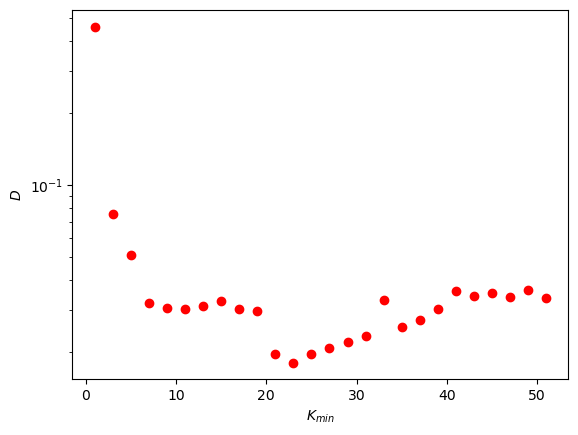

In [31]:
D_list = []
for x in np.linspace(1,51,26):
    fit = powerlaw.Fit(degree_seq2, xmin = x)
    D_list.append(fit.power_law.D)

plt.plot(np.linspace(1,51,26), D_list, "ro")
plt.xlabel("$K_{min}$")
plt.ylabel("$D$")
plt.yscale("log")